#Space AG Data Analyst Challenge

**Prostulante:** Cristopher Ramorino

#Preparación de entorno.


Intsalando dependencias para descargar datos satelitales e importar datos geojson

In [36]:
!pip install sentinelhub
!pip install geopandas
!pip install numpngw


Crando carpeda donde se almacenarán imágenes.

In [37]:
!mkdir 'NDVIS'
!mkdir 'Images'

mkdir: cannot create directory ‘NDVIS’: File exists
mkdir: cannot create directory ‘Images’: File exists


In [38]:
!curl -L -o "SentinelHub_dates.xlsx" 'https://docs.google.com/uc?export=download&id=1qrXU6spbYjh4uE3IeX60eA9tBDXy8NkI'
!curl -L -o "Map.geojson" "https://docs.google.com/uc?export=download&id=1iuM9xaKXUKwbfOqciFoq4QVGS53AgY1X"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1065      0 --:--:-- --:--:-- --:--:--  1063
100  7254  100  7254    0     0   4072      0  0:00:01  0:00:01 --:--:-- 35910
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1361      0 --:--:-- --:--:-- --:--:--  1366
100 91515  100 91515    0     0   142k      0 --:--:-- --:--:-- --:--:--  657k


Cargando dependencias

In [0]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sentinelhub import SHConfig, DataSource, geometry
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, data_request
import datetime
import matplotlib.pyplot as plt
import numpngw

Preparando *Data Frames* de los archivos de datos.


In [40]:
df_dates = pd.read_excel('/content/SentinelHub_dates.xlsx')
df_dates.head(100)


,id,farm,_date,_datetime_utc,validated
0,14180,163,2020-04-20,2020-04-20 15:26:52,1
1,13892,163,2020-04-15,2020-04-15 15:26:57,1
2,11899,163,2020-03-11,2020-03-11 15:26:55,1
3,11202,163,2020-02-15,2020-02-15 15:26:51,1
4,10946,163,2020-02-10,2020-02-10 15:26:52,1
...,...,...,...,...,...
84,8513,163,2016-12-22,2016-12-22 15:23:53,1
85,8514,163,2016-12-02,2016-12-02 15:21:03,1
86,8515,163,2016-11-22,2016-11-22 15:19:30,1
87,8518,163,2016-09-13,2016-09-13 15:26:48,1


Crando instancia de conexión a Sentinel Hub

In [0]:
INSTANCE_ID = 'c3bb03eb-c991-420e-b174-b31b09085965'  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID

else:
    config = None

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
   
    else:
        plt.imshow(image)
    

In [0]:

betsiboka_coords_wgs84 = [46.16, -16.15, 46.51, -15.58]

In [0]:
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84) #ejemplo sentinel hub
bound_box=lotes['box'].to_list()


##Carga de datos

Cargando datos de lotes.

In [46]:
df_maps=gpd.read_file('Map.geojson')
lote_ids=[df_maps.values[i][1]['id'] for i in range(df_maps.shape[0])]
lote_names=[df_maps.values[i][1]['name'] for i in range(df_maps.shape[0])]
geo=df_maps.geometry.to_list()
boxes=[geometry.Geometry(geo[i], crs=CRS.WGS84).bbox for i in range(len(geo))]
lotes=pd.DataFrame({'id':lote_ids,'name':lote_names,'box':boxes})


lotes



,id,name,box
0,90214,AGRICOLA CHAPI.DON ERNESTO.PAL-1.36,"-75.64298408105815,-14.20062882414364,-75.6396..."
1,90215,AGRICOLA CHAPI.DON ERNESTO.PAL-1.37,"-75.64565052221766,-14.20155933262638,-75.6423..."
2,90216,AGRICOLA CHAPI.DON ERNESTO.PAL-1.42,"-75.64231663022875,-14.202454024468352,-75.638..."
3,90217,AGRICOLA CHAPI.DON ERNESTO.PAL-1.43,"-75.64498414018,-14.203383890611855,-75.641649..."
4,90218,AGRICOLA CHAPI.DON ERNESTO.PAL-1.48,"-75.64164955317383,-14.20428015816881,-75.6383..."
5,90219,AGRICOLA CHAPI.DON ERNESTO.PAL-1.49,"-75.64431888131925,-14.20521201651521,-75.6409..."
6,90221,AGRICOLA CHAPI.DON ERNESTO.PAL-2.54,"-75.64098212423809,-14.206095306337506,-75.637..."
7,90222,AGRICOLA CHAPI.DON ERNESTO.PAL-2.55,"-75.64365231081416,-14.20702879053244,-75.6403..."
8,90224,AGRICOLA CHAPI.DON ERNESTO.PAL-3.60,"-75.64031869971863,-14.207924450844159,-75.636..."
9,90225,AGRICOLA CHAPI.DON ERNESTO.PAL-3.61,"-75.64298986878343,-14.20885416235629,-75.6396..."


Cargando fechas.

In [0]:

#Retrieve bands for the requested dates 
datetimes=pd.to_datetime(df_dates['_date'])
date_max=datetimes.max().strftime('%Y-%m-%d')
date_max='2016-07-18'                             #Borrar esta linea en versión final.
date_min=datetimes.min().strftime('%Y-%m-%d')


Descarga de bandas de Sentinel 2, cálculo de imagenes NDVI y exportación de imagenes.

**Advertencia:** La siguiente sección de código puede tomar muchisimos minutos.

In [0]:

data_lotes=pd.DataFrame(columns=('fecha','id_lote','name','bands'))

n_days=100                               #Si desea disminuir tiempos de ejecución, podrá limitar la cantidad de días a descargar cambiando esta variable.

fech=[]
id_lot=[]
names=[]
ndvis=[]
ndvi_AVG=[]
i=0
for date in df_dates['_date'].to_list():
  for b in lotes.index:
    req = WmsRequest(
        layer='BANDS-S2-L1C',
        bbox=lotes['box'].iloc[b],
        maxcc =0.50,
        time=date,
        width=512,
        height=856,
        image_format=MimeType.TIFF_d32f,
        config=config
    )
  
    fech.append(date)
    id_lot.append(lotes['id'][b])
    names.append(lotes['name'][b])
    bands=req.get_data()
    if bands:
      B4=bands[0][:,:,4]
      B8=bands[0][:,:,8]
      NDVI=(B8-B4)/(B8+B4)
      ndvis.append(NDVI)
      ndvi_AVG.append(np.mean(NDVI))
      title='Lote: '+str(lotes['id'][b])+' Fecha: '+date
      plt.title(title)
      plt.imshow(NDVI)
      plt.savefig('./Images/'+title+'.png',dpi=300, format='png')
      image=np.array(255*(NDVI+1)/2,dtype='uint8')
      numpngw.write_png('./NDVIS/'+title+'.png',image, bitdepth=8)
    else:
      ndvi_AVG.append(np.nan)
    i+=1
  if i>32*n_days: break


Creando *Data Frame* para análisis.

In [51]:
data={'fecha':fech,'id_lote':id_lot,'name':names,'ndvi_avg':ndvi_AVG}
data_lotes=pd.DataFrame(data)

data_lotes.head()

,fecha,id_lote,name,ndvi_avg
0,2020-04-20,90214,AGRICOLA CHAPI.DON ERNESTO.PAL-1.36,0.572022
1,2020-04-20,90215,AGRICOLA CHAPI.DON ERNESTO.PAL-1.37,0.576016
2,2020-04-20,90216,AGRICOLA CHAPI.DON ERNESTO.PAL-1.42,0.599637
3,2020-04-20,90217,AGRICOLA CHAPI.DON ERNESTO.PAL-1.43,0.607132
4,2020-04-20,90218,AGRICOLA CHAPI.DON ERNESTO.PAL-1.48,0.603105


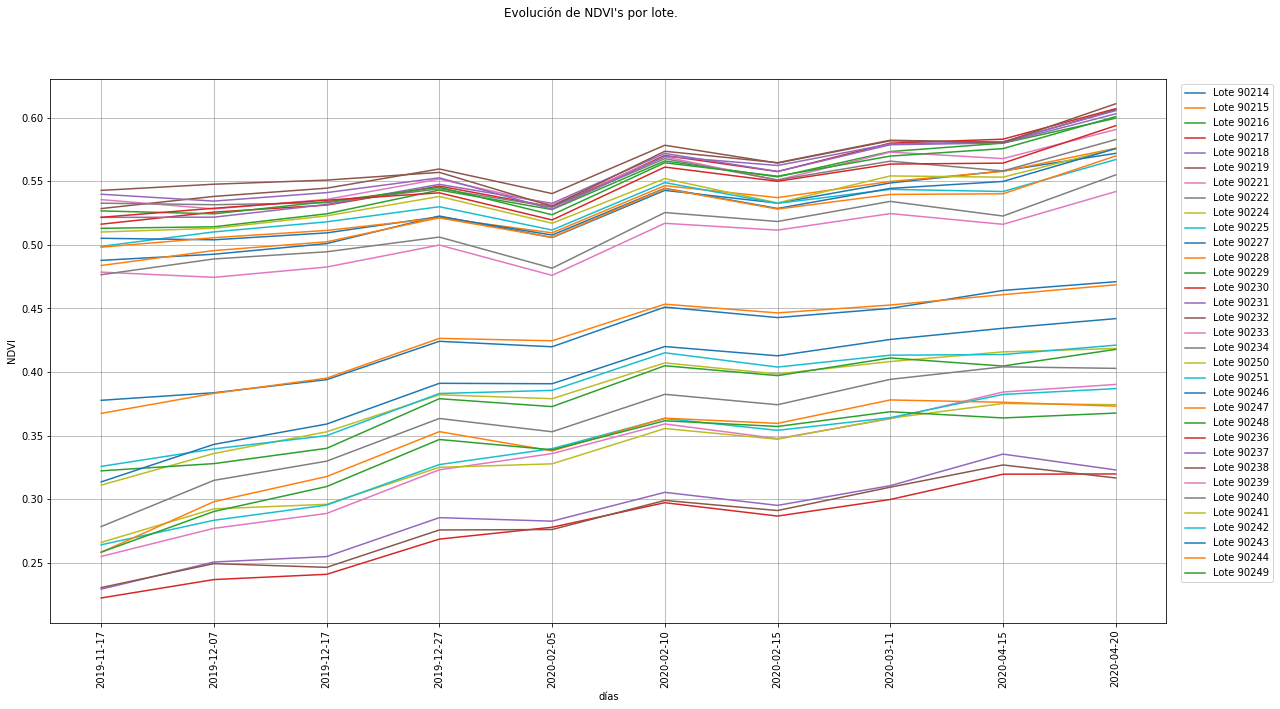

[329, 296, 263, 230, 197, 164, 131, 98, 65, 32]


In [55]:
def plot_curves(_df):

  
  lotes_df=_df['id_lote'].unique()

  for lot in lotes_df:
    df_lote=_df[_df.id_lote==lot ]
    ind = df_lote.index
    indexes=list(reversed(ind.tolist()))
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 20
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.suptitle("Evolución de NDVI's por lote.")
    plt.xlabel('días')
    plt.ylabel('NDVI')
    plt.plot(df_lote['fecha'].loc[indexes],df_lote['ndvi_avg'].loc[indexes],label='Lote '+ str(lot))
    plt.xticks(rotation=90)
    plt.grid(color='grey', linestyle='-', linewidth=0.5)
    plt.legend(bbox_to_anchor=(1.1, 1))
  plt.show()
  print(list(reversed(ind.tolist())))

plot_curves(data_lotes)



##Conclusiones:

Podemos apreciar que para los distintos lotes, los valores promedio de NDVI presentan un aumento con el paso de los días (en general), también podemos apreciar que para la mayoría de lotes, estos presentan un NDVI promedio entre valores $0.5$ y $0.6$ que representa valores para la vegetación, por lo que estos lotes en este rango poseen mayor vegetación o más sana que los lotes en los rangos menores de NDVI, sin embargo podemos inferir que en la mayoría de lotes la vegetación va aumentando.

Respecto al código, cabe destacar que se realizaron esfuerzos por paralelizar la descarga del servidor de Sentinel Hub, sin embargo este arroja un error ya que no permite consultas simultaneas o muy cercanas en el tiempo (tal vez por ser cuenta gratuita), por lo que se programó esta parte con un for anidado que resulta menos eficiente.

Sería interesante también realizar *forecasting* sobre los datos para predecir los NDVI's futuros aplicando modelos de series de tiempo.
